### Code to find significance using Poisson distribution

[8.67621256e-01 1.23202218e-01 8.74735751e-03 4.14041589e-04
 1.46984764e-05 4.17436730e-07]
5 sigma significance
p-value: 1.0083359480717036e-08
Pertentage: 99.99999899166406% 


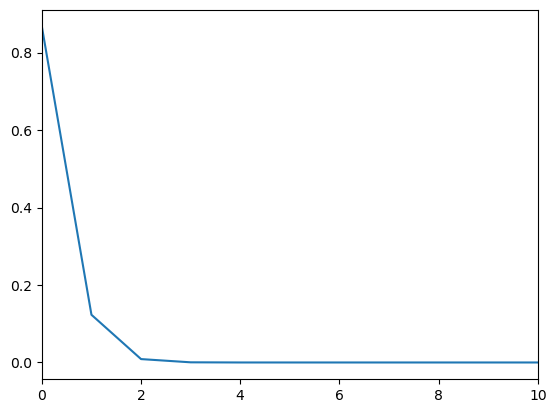

In [5]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt
three_sigma = 1.35 * 1e-3
five_sigma = 2.87 * 1e-7

# KamLAND 0.142 b.e / 48 hours
# Theia 5.1258 b.e / 48 hours no cuts!
# Theia 4.072553 b.e / 48 hours cut out 50% reactor background
background = 0.142
events = 6

x = np.arange(0, 50, 1)
 
probabilities = poisson.pmf(x, background)
print(probabilities[:events])

plt.plot(x, probabilities)
plt.xlim(0, 10)

p_value = 1 - sum(probabilities[:events])
if p_value <= five_sigma:
    print ("5 sigma significance")
elif p_value <= three_sigma:
    print("3 sigma significance")
else:
    print("Below 3 sigma significance")

print("p-value: {}".format(p_value))
Percentage = 100-(p_value*100)
print("Pertentage: {}% ".format(Percentage))

### Find median significance using equation 40.84 in Particle Data Group Statistics chapter

"To approximate the expected discovery significance assuming µ = 1, one may simply replace n with the expected value E[n|µ = 1] = s+b (the so-called “Asimov data set”), giving:"

In [1]:
import math

# KamLAND 0.142 b.e / 48 hours
# Theia 5.1258 b.e / 48 hours no cuts!
# Theia 4.072553 b.e / 48 hours cut out 50% reactor background

#Background
b = 4.072553

#Pre-SN signal
s = 13

significance = math.sqrt(2 * (((s + b) * math.log(1 + (s/b))) - s))
print (significance)

4.789241544932066


### False positive rates

In [29]:
background = 815 #Per year
events = 6
time_scale = 0.5 #In days

average_bg = (background/ 365) * time_scale
pb = poisson.pmf(events, average_bg)

print ("False Positive Probabaility: {}% ".format(pb*100))

time_window_year = 365 / time_scale
average_false = pb * time_window_year


False Positive Probabaility: 0.08806695446602553% 
